In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

Here we reformat our dataset to aid in our visualization. We first subset the data to just have numeric, non-binary variables, then we format our columns to be more readable, then we melt the dataframe so it can be cleanly faceted using the `col` argument in the subsequent code.

In [4]:
diabetes_numeric = diabetes[['Diabetes_binary','BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']]

diabetes_numeric=diabetes_numeric.rename(columns={'Diabetes_binary': "Diabetes", 'GenHlth': "General Health", "MentHlth": "Mental Health", 'PhysHlth': 'Physical Health'})

diabetes_numeric['Diabetes'] = diabetes_numeric['Diabetes'].map({1: "Has diabetes",0 :'Does not have diabetes' })

melted = diabetes_numeric
melted = melted.melt(id_vars = ['Diabetes']).rename(columns={'variable':"Indicator"})

Here we examine the distribution of each indicator split by diabetic status to see whether there are variables that seem to be potential indicators for our models.

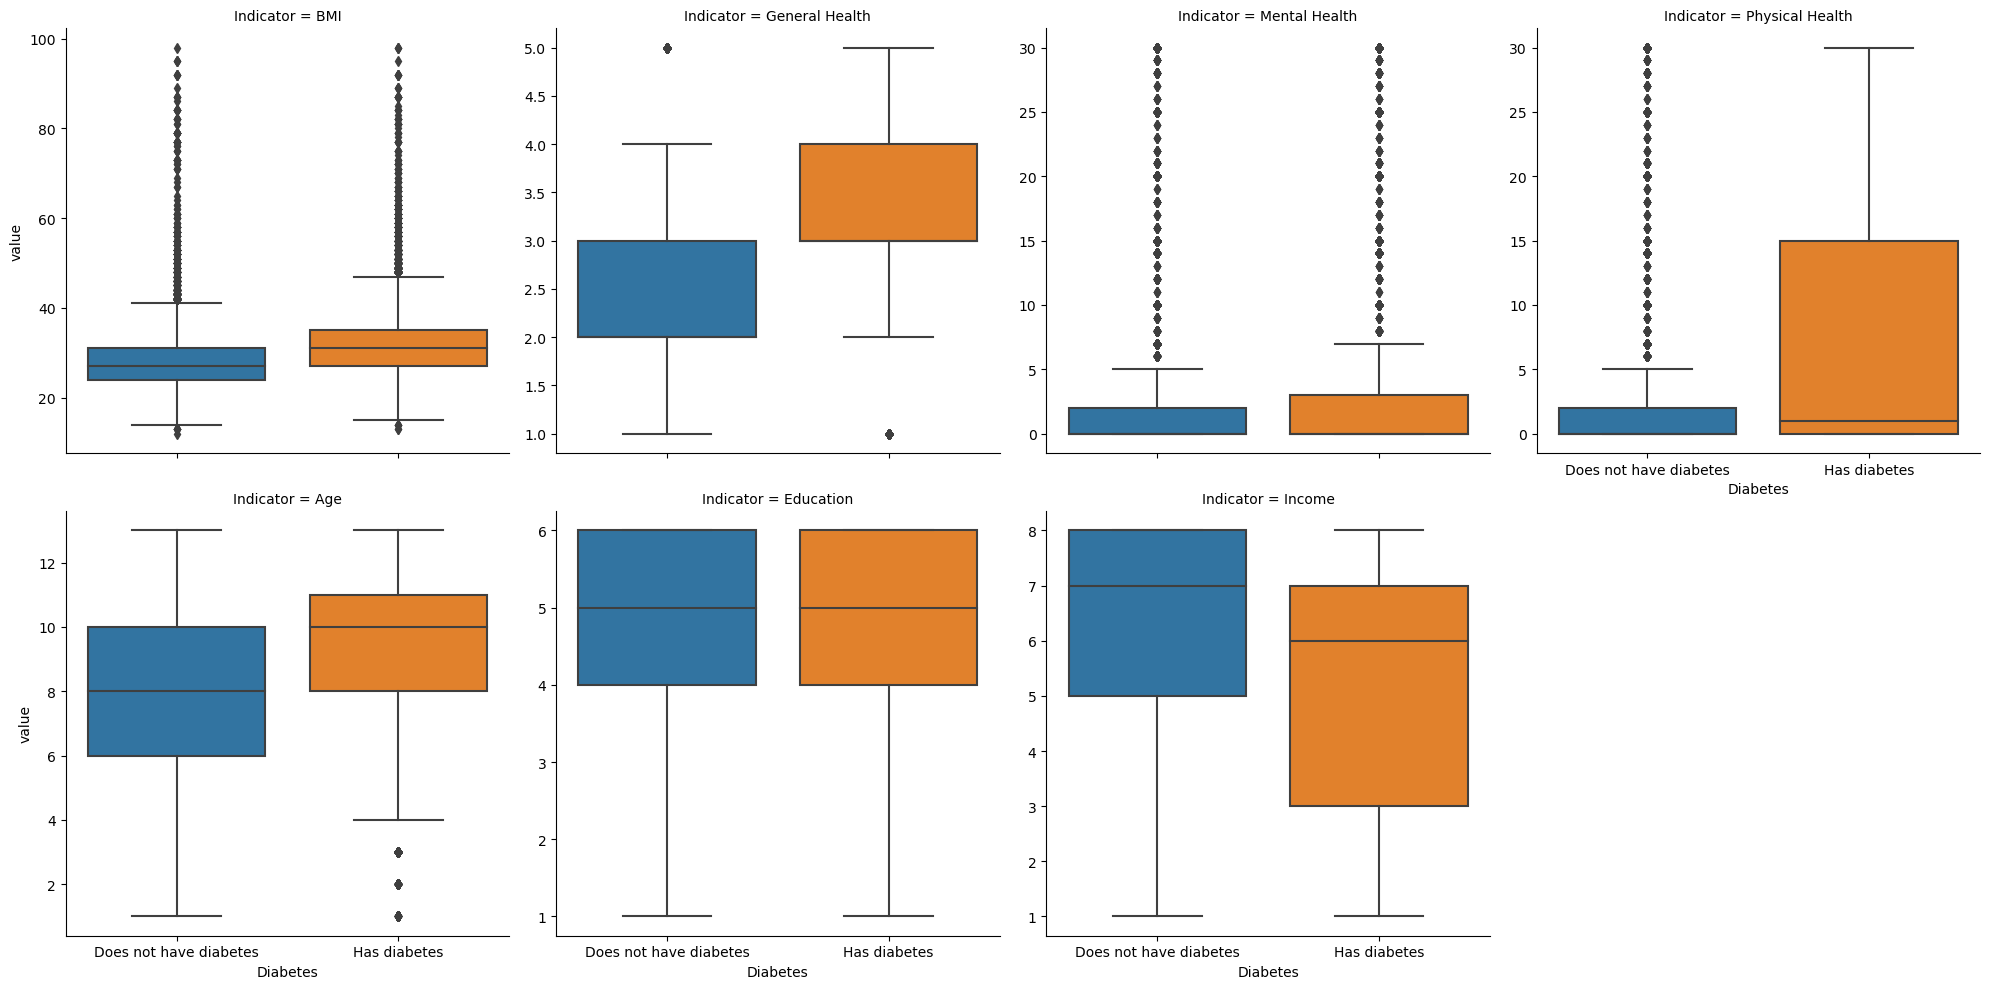

In [5]:
sns.catplot(data=melted, x='Diabetes', y='value', col='Indicator', kind='box', col_wrap=4,sharey=False)
plt.show()

Here we confirm that the dataset is, indeed, split 50-50.

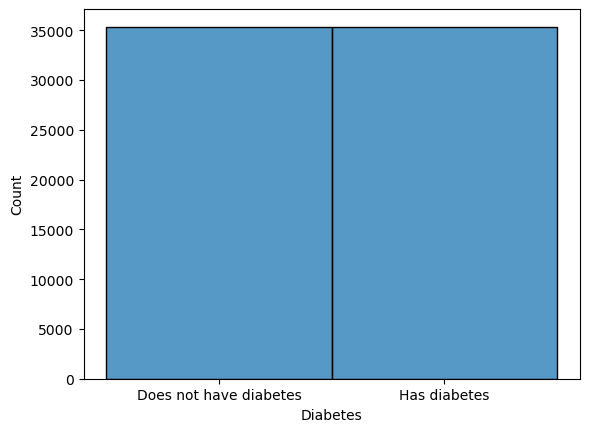

In [6]:
sns.histplot(data = diabetes_numeric, x = 'Diabetes')
plt.show()